In [1]:
import numpy as np
import math
import pandas as pd
from timeit import default_timer as timer  
import datetime

from pandas_datareader import data
import pandas_datareader as web
import seaborn as sns

import datetime
from datetime import timezone
from datetime import datetime

import matplotlib.pyplot as plt
from matplotlib import style
plt.style.use('dark_background')

from scipy.optimize import minimize
from scipy import stats
from random import sample
import statsmodels.api as sm


import statsmodels
from IPython.display import display, clear_output

from pathlib import Path


In [2]:
# DATASET_FILEPATH = "./Data Preprocessed/Dataset_sentiment_100K_glove_filtered_2g.csv"
# DATASET_FILEPATH = "./Data Preprocessed/Dataset_sentiment_100K_glove_filtered_2g_user_weights.csv"
# DATASET_FILEPATH = "./Data Preprocessed/Dataset_sentiment_BERT_trainable_full.csv"
# DATASET_FILEPATH = "./Data Preprocessed/Dataset_sentiment_100K_glove_91_filtered_full_user_weights_user_averaged.csv"
# DATASET_FILEPATH = "./Data Preprocessed/Dataset_sentiment_100K_glove_filtered_full_user_weights.csv"
# DATASET_FILEPATH = "./Data Preprocessed/Dataset_sentiment_100K_glove_filtered_full_user_weights_user_averaged.csv"
# DATASET_FILEPATH = "./Data Preprocessed/Dataset_sentiment_100K_glove_91_filtered_full_user_averaged.csv"
DATASET_FILEPATH = "./Data Preprocessed/Dataset_sentiment_100K_91_glove_filtered_full.csv"

TRADING_STRATEGY_FILEPATH = './Trading Strategy'

## Inspecting the Datasets

In [8]:
DATASET_FILEPATHS = ["./Data Preprocessed/Dataset_sentiment_100K_glove_filtered_2g.csv"
,"./Data Preprocessed/Dataset_sentiment_100K_glove_filtered_2g_user_weights.csv"
,"./Data Preprocessed/Dataset_sentiment_BERT_trainable_full.csv"
,"./Data Preprocessed/Dataset_sentiment_100K_glove_filtered_full_user_weights.csv"
,"./Data Preprocessed/Dataset_sentiment_100K_glove_filtered_full_user_weights_user_averaged.csv"]

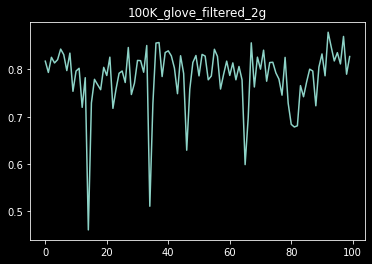

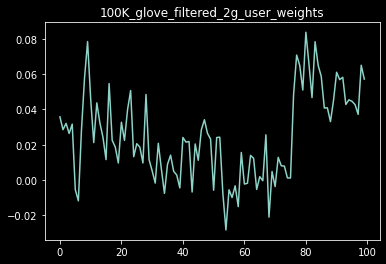

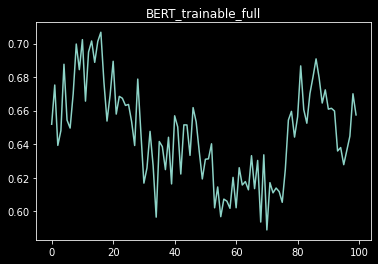

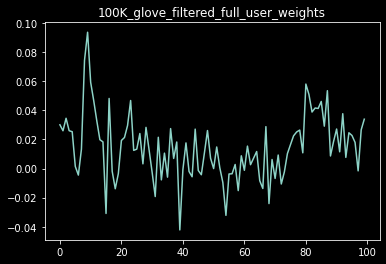

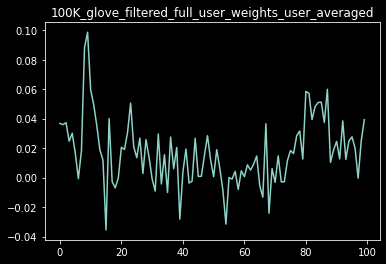

In [10]:
for filepath in DATASET_FILEPATHS:
    df = pd.read_csv(filepath, index_col = 0)
    format = "%Y-%m-%d %H"
    df.index = [datetime.strptime(i, format) for i in df.index]
    plt.title(filepath[38:-4])
    plt.plot(df['Bitcoin'][1200:1300].values)
    plt.show()

In [11]:
for filepath in DATASET_FILEPATHS:
    df = pd.read_csv(filepath, index_col = 0)
    format = "%Y-%m-%d %H"
    df.index = [datetime.strptime(i, format) for i in df.index]
    #BTC price data of the next hour standarized
    Y = pd.DataFrame(df['Open']).astype(float)
    #Y = dataset_standarization(Y)

    #Textual data ('Bitcoin' topic popularity) of the last hour standarized
    X = pd.DataFrame(df['Bitcoin_median']).astype(float)
    #X = dataset_standarization(X)
    Y.index = X.index

    X = sm.add_constant(X)

    model = sm.OLS(Y, X, missing = 'drop').fit()
    print(filepath[38:-4])
    print(model.summary())

100K_glove_filtered_2g
                            OLS Regression Results                            
Dep. Variable:                   Open   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.716
Date:                Thu, 24 Jun 2021   Prob (F-statistic):              0.190
Time:                        00:30:47   Log-Likelihood:                -13248.
No. Observations:                1428   AIC:                         2.650e+04
Df Residuals:                    1426   BIC:                         2.651e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           5495.

## Import Sentiment values

In [11]:
df = pd.read_csv(DATASET_FILEPATH, index_col = 0)
format = "%Y-%m-%d %H"
df.index = [datetime.strptime(i, format) for i in df.index]
df

,Bitcoin,Bitcoin_median,open,close
2017-09-13 01:00:00,0.586789,0.623524,4142.25,4105.13
2017-09-13 02:00:00,0.607135,0.631940,4101.49,4026.02
2017-09-13 03:00:00,0.586056,0.623793,4035.48,3945.00
2017-09-13 04:00:00,0.564152,0.610086,3951.62,4010.00
2017-09-13 05:00:00,0.639324,0.745114,4009.01,3975.99
...,...,...,...,...
2019-01-22 18:00:00,0.671039,0.809904,3591.48,3590.67
2019-01-22 19:00:00,0.659036,0.802012,3589.30,3579.28
2019-01-22 20:00:00,0.651866,0.825288,3579.28,3585.51
2019-01-22 21:00:00,0.667588,0.813837,3586.72,3574.26


### Anlytics on Median vs mean

In [6]:
df['date'] = df.index.map(lambda x : str(x)[:-8])
df['place'] = range(0,1413)
df

,Bitcoin,Bitcoin_median,Open,date,place
2017-09-13 01:00:00,0.041773,0.066211,4128.005439,2017-09-13,0
2017-09-13 02:00:00,0.051911,0.089798,4066.801167,2017-09-13,1
2017-09-13 03:00:00,0.027604,0.052726,3999.225167,2017-09-13,2
2017-09-13 04:00:00,0.018836,0.042056,3959.409667,2017-09-13,3
2017-09-13 05:00:00,0.076571,0.109514,3995.046667,2017-09-13,4
...,...,...,...,...,...
2019-01-22 18:00:00,0.030288,0.050931,3584.926897,2019-01-22,1408
2019-01-22 19:00:00,0.025549,0.053502,3585.858545,2019-01-22,1409
2019-01-22 20:00:00,0.028746,0.057698,3585.295893,2019-01-22,1410
2019-01-22 21:00:00,0.034695,0.073557,3579.910755,2019-01-22,1411


In [81]:
k = pd.DataFrame(df.groupby(['date']).Bitcoin_median.apply(np.mean).values)
index = df.groupby(['date']).place.first()
l = pd.DataFrame(df.groupby(['date']).Bitcoin.apply(np.mean).values)

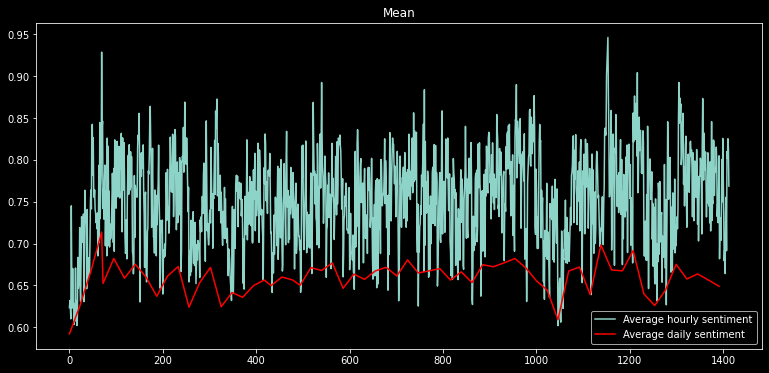

In [90]:
fig = plt.figure(figsize=(13, 6))
plt.title("Mean")
x_axis = range(0,1413)

plt.plot(x_axis,df.Bitcoin_median, label = 'Average hourly sentiment')
plt.plot(index,df.groupby(['date']).Bitcoin.apply(np.mean),color = "red", label = 'Average daily sentiment')
plt.legend()
plt.show()

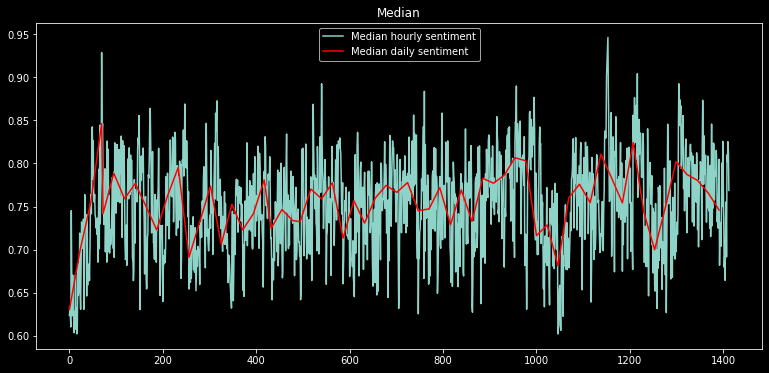

In [93]:
fig = plt.figure(figsize=(13, 6))
plt.title("Median")
x_axis = range(0,1413)

plt.plot(x_axis,df.Bitcoin_median, label = 'Median hourly sentiment')
plt.plot(index,df.groupby(['date']).Bitcoin_median.apply(np.median),color = "red", label = 'Median daily sentiment')
plt.legend()
plt.show()

## Trading Strategy Backtesting <a class="anchor" id="section_5_3"></a>

In [12]:
import sys
# insert at 1, 0 is the script path (or '' in REPL)
sys.path.append(TRADING_STRATEGY_FILEPATH)
sys.path.append('./Data Preprocessed')
from custom_trading_engine import customNLP
from signals import *
from strategies import *
from data_import import BTC_total

In [13]:
signal = Signal3(df['Bitcoin'])
strategy = BitcoinNLPStrategy()
strategy.add_signal(signal)
algo = customNLP(10000000, df[['open','close']], strategy)
#algo.set_stoploss(0.01)

algo.run(split = True)

C:\Users\Konst\Desktop\PythonNotebooks\TradingNLP\./Trading Strategy\signals.py:86: RuntimeWarning: invalid value encountered in double_scalars
  return -(self.data[datetime] - mean)/stdv


selling  10000000.0  BTC at  4101.49  $
closing  -10000000.0  BTC at  4035.48  $
buying  7562730.824262472  BTC at  4035.48  $
closing  7562730.824262472  BTC at  3951.62  $
Insufficient Capital
selling  16867458.336662937  BTC at  4009.01  $
closing  -16867458.336662937  BTC at  3985.01  $
selling  1788661.5064591428  BTC at  3985.01  $
closing  -1788661.5064591428  BTC at  4033.98  $
buying  133035.01258903457  BTC at  4033.98  $
closing  133035.01258903457  BTC at  3947.1  $
selling  11504458.027589608  BTC at  3947.1  $
closing  -11504458.027589608  BTC at  3940.0  $
buying  6359262.205649554  BTC at  3940.0  $
closing  6359262.205649554  BTC at  3848.34  $
Insufficient Capital
buying  6075214.247735911  BTC at  3830.0  $
closing  6075214.247735911  BTC at  3880.0  $
Insufficient Capital
selling  9004263.435840229  BTC at  3836.64  $
closing  -9004263.435840229  BTC at  3758.79  $
buying  2696315.4920569444  BTC at  3758.79  $
closing  2696315.4920569444  BTC at  3819.51  $
selling

selling  12539299.174630595  BTC at  5658.8  $
closing  -12539299.174630595  BTC at  5615.89  $
selling  7507020.001958039  BTC at  5615.89  $
closing  -7507020.001958039  BTC at  5593.58  $
selling  11538983.028095117  BTC at  5593.58  $
closing  -11538983.028095117  BTC at  5636.99  $
selling  6937446.981379893  BTC at  5636.99  $
closing  -6937446.981379893  BTC at  5681.72  $
Insufficient Capital
buying  4169899.7453492614  BTC at  5733.0  $
closing  4169899.7453492614  BTC at  5716.0  $
selling  3501294.989534955  BTC at  5716.0  $
closing  -3501294.989534955  BTC at  5670.0  $
buying  308847.540537537  BTC at  5670.0  $
closing  308847.540537537  BTC at  5687.0  $
selling  4187847.541882138  BTC at  5687.0  $
closing  -4187847.541882138  BTC at  5682.02  $
selling  709679.8074272154  BTC at  5682.02  $
closing  -709679.8074272154  BTC at  5694.99  $
buying  4370995.950517308  BTC at  5694.99  $
closing  4370995.950517308  BTC at  5678.02  $
Insufficient Capital
selling  1011337.8

closing  1434881.6738195396  BTC at  11100.0  $
Insufficient Capital
buying  8586497.937574428  BTC at  16250.29  $
closing  8586497.937574428  BTC at  15955.29  $
selling  1030144.3800875811  BTC at  15955.29  $
closing  -1030144.3800875811  BTC at  15962.03  $
Insufficient Capital
selling  3803828.816071157  BTC at  16149.66  $
closing  -3803828.816071157  BTC at  16161.01  $
selling  6744016.414335357  BTC at  16161.01  $
closing  -6744016.414335357  BTC at  16145.0  $
buying  2414667.3908623126  BTC at  16145.0  $
closing  2414667.3908623126  BTC at  16390.0  $
selling  6519063.93697499  BTC at  16390.0  $
closing  -6519063.93697499  BTC at  16553.0  $
selling  1014640.2267318376  BTC at  16553.0  $
closing  -1014640.2267318376  BTC at  16344.88  $
selling  4546878.259836173  BTC at  16344.88  $
closing  -4546878.259836173  BTC at  16560.0  $
Insufficient Capital
selling  7814904.728070396  BTC at  16569.99  $
closing  -7814904.728070396  BTC at  16638.39  $
Insufficient Capital
In

closing  5242686.966157118  BTC at  6964.61  $
selling  16113990.153758248  BTC at  6964.61  $
closing  -16113990.153758248  BTC at  6943.31  $
selling  5553894.678391084  BTC at  6943.31  $
closing  -5553894.678391084  BTC at  6917.23  $
selling  12990916.845236447  BTC at  6917.23  $
closing  -12990916.845236447  BTC at  6935.31  $
buying  719009.0742608714  BTC at  6935.31  $
closing  719009.0742608714  BTC at  6967.52  $
selling  3157368.8388606994  BTC at  6967.52  $
closing  -3157368.8388606994  BTC at  6982.54  $
buying  1970704.0186359922  BTC at  6982.54  $
closing  1970704.0186359922  BTC at  6985.8  $
selling  4787980.085227271  BTC at  6985.8  $
closing  -4787980.085227271  BTC at  7082.85  $
selling  14937826.663509186  BTC at  7082.85  $
closing  -14937826.663509186  BTC at  7059.43  $
buying  4787010.984504768  BTC at  7059.43  $
closing  4787010.984504768  BTC at  7025.0  $
Insufficient Capital
buying  4541386.772089173  BTC at  7042.72  $
closing  4541386.772089173  BT

buying  1827445.1730145018  BTC at  8198.41  $
closing  1827445.1730145018  BTC at  8170.0  $
selling  10426426.220090315  BTC at  8170.0  $
closing  -10426426.220090315  BTC at  8219.88  $
selling  6006065.779371177  BTC at  8219.88  $
closing  -6006065.779371177  BTC at  8230.99  $
selling  16663392.355587125  BTC at  8230.99  $
closing  -16663392.355587125  BTC at  8222.02  $
selling  8663458.783426233  BTC at  8222.02  $
closing  -8663458.783426233  BTC at  8205.83  $
selling  4340503.6710846545  BTC at  8205.83  $
closing  -4340503.6710846545  BTC at  8187.99  $
buying  5064463.409052562  BTC at  8187.99  $
closing  5064463.409052562  BTC at  8112.0  $
buying  793764.7342196797  BTC at  8112.0  $
closing  793764.7342196797  BTC at  8076.99  $
Insufficient Capital
buying  1378103.1533872795  BTC at  7974.24  $
closing  1378103.1533872795  BTC at  7984.08  $
selling  9047686.75356195  BTC at  7122.26  $
closing  -9047686.75356195  BTC at  7112.77  $
selling  2738860.947613874  BTC a

closing  -8965477.678966325  BTC at  6632.81  $
selling  14427551.451666052  BTC at  6632.81  $
closing  -14427551.451666052  BTC at  6640.12  $
selling  9517813.18682598  BTC at  6640.12  $
closing  -9517813.18682598  BTC at  6626.7  $
selling  4193890.525170193  BTC at  6626.7  $
closing  -4193890.525170193  BTC at  6597.9  $
selling  2613568.3812804925  BTC at  6597.9  $
closing  -2613568.3812804925  BTC at  6605.66  $
selling  11745675.545369798  BTC at  6605.66  $
closing  -11745675.545369798  BTC at  6450.99  $
selling  4866524.45937632  BTC at  6450.99  $
closing  -4866524.45937632  BTC at  6472.94  $
selling  13121429.111814804  BTC at  6472.94  $
closing  -13121429.111814804  BTC at  6361.74  $
buying  8183109.893192131  BTC at  6361.74  $
closing  8183109.893192131  BTC at  6371.8  $
selling  321534.0354621295  BTC at  6371.8  $
closing  -321534.0354621295  BTC at  6385.02  $
selling  9480230.059685845  BTC at  6385.02  $
closing  -9480230.059685845  BTC at  6379.12  $
sellin

closing  9108596.833949072  BTC at  6233.93  $
Insufficient Capital
buying  2004367.8945611299  BTC at  6247.33  $
closing  2004367.8945611299  BTC at  6235.67  $
buying  739389.1559288548  BTC at  6235.67  $
closing  739389.1559288548  BTC at  6281.43  $
Insufficient Capital
buying  8393919.742897782  BTC at  6240.85  $
closing  8393919.742897782  BTC at  6260.0  $
selling  182859.25445016587  BTC at  6260.0  $
closing  -182859.25445016587  BTC at  6252.63  $
selling  9118668.330904216  BTC at  6032.28  $
closing  -9118668.330904216  BTC at  5993.29  $
Insufficient Capital
selling  4090470.505457549  BTC at  6000.52  $
closing  -4090470.505457549  BTC at  5980.11  $
Insufficient Capital
selling  15259617.878262177  BTC at  5978.06  $
closing  -15259617.878262177  BTC at  6035.01  $
selling  1855743.154843279  BTC at  6035.01  $
closing  -1855743.154843279  BTC at  6027.92  $
selling  7681362.075552469  BTC at  6027.92  $
closing  -7681362.075552469  BTC at  6048.87  $
selling  1376119

closing  -7197831.610149595  BTC at  6449.99  $
buying  1480766.8514855423  BTC at  6449.99  $
closing  1480766.8514855423  BTC at  6444.69  $
selling  4583534.527101855  BTC at  6444.69  $
closing  -4583534.527101855  BTC at  6444.94  $
selling  9944086.575563831  BTC at  6444.94  $
closing  -9944086.575563831  BTC at  6442.87  $
buying  3764302.8829444144  BTC at  6442.87  $
closing  3764302.8829444144  BTC at  6446.56  $
selling  5082038.823243219  BTC at  6446.56  $
closing  -5082038.823243219  BTC at  6432.5  $
Insufficient Capital
selling  7055408.601714207  BTC at  6436.33  $
closing  -7055408.601714207  BTC at  6441.69  $
selling  1887110.9753453082  BTC at  6441.69  $
closing  -1887110.9753453082  BTC at  6442.01  $
selling  6664120.508066259  BTC at  6442.01  $
closing  -6664120.508066259  BTC at  6429.74  $
buying  1312016.4359257882  BTC at  6429.74  $
closing  1312016.4359257882  BTC at  6392.64  $
selling  6515350.771314287  BTC at  6392.64  $
closing  -6515350.771314287 

closing  -7800747.382000099  BTC at  3839.95  $
selling  2888171.4492049157  BTC at  3839.95  $
closing  -2888171.4492049157  BTC at  3852.49  $
buying  984586.6813636525  BTC at  3852.49  $
closing  984586.6813636525  BTC at  3850.0  $
selling  1025529.390859042  BTC at  3850.0  $
closing  -1025529.390859042  BTC at  3836.8  $
selling  2142378.123104673  BTC at  3836.8  $
closing  -2142378.123104673  BTC at  3841.52  $
selling  9318825.979596382  BTC at  3841.52  $
closing  -9318825.979596382  BTC at  3773.86  $
buying  3751489.6923351698  BTC at  3773.86  $
closing  3751489.6923351698  BTC at  3783.45  $
buying  7307402.2876575645  BTC at  3783.45  $
closing  7307402.2876575645  BTC at  3781.15  $
buying  3351292.3679292845  BTC at  3781.15  $
closing  3351292.3679292845  BTC at  3798.65  $
buying  7655718.355696609  BTC at  3798.65  $
closing  7655718.355696609  BTC at  3791.3  $
buying  200617.1947180816  BTC at  3791.3  $
closing  200617.1947180816  BTC at  3792.8  $
Insufficient 

In [22]:
# signal = RandomSignal()
# strategy = BitcoinBNHStrategy()
# strategy.add_signal(signal)
# algo = customNLP(100000, df['Open'], strategy)
# #algo.set_stoploss(0.01)
# algo.run(split = True)

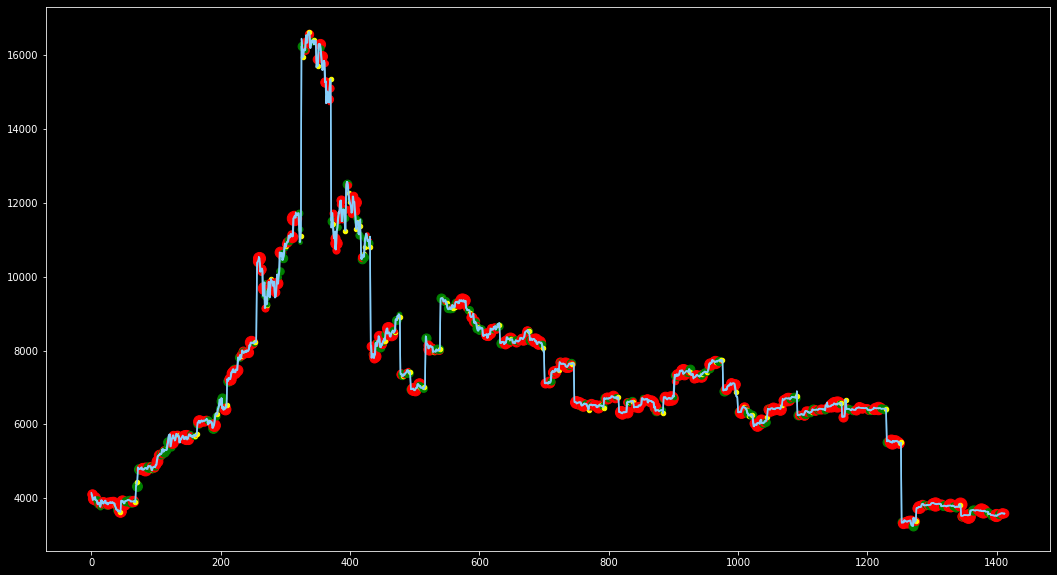

In [23]:
#plot trading history
algo.plot()

C:\Users\Konst\anaconda3\envs\tensorflow-gpu\lib\site-packages\numpy\lib\arraysetops.py:580: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


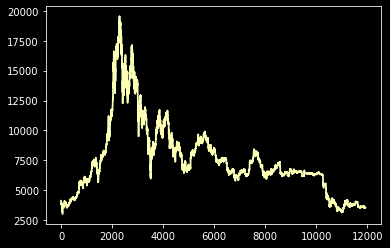

In [4]:
BTC_total()

In [14]:
#a better plotting of trading history
btc = pd.read_csv('./BTC_full.csv', index_col = 0)
format = "%Y-%m-%d %H"
btc.index = [datetime.strptime(i, format) for i in btc.index]

algo.plot2(btc[:-1])

C:\Users\Konst\Desktop\PythonNotebooks\TradingNLP\./Trading Strategy\custom_trading_engine.py:250: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sign'] = df['Position USD'].apply(np.sign)
C:\Users\Konst\Desktop\PythonNotebooks\TradingNLP\./Trading Strategy\custom_trading_engine.py:251: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['change'] = df['Position USD'].diff().fillna(1)
C:\Users\Konst\Desktop\PythonNotebooks\TradingNLP\./Trading Strategy\custom_trading_engine.py:252: UserWarning: Boolean Seri

In [25]:
algo.cash

9430170.992429646

In [ ]:
print(algo.metrics.dropna().info(verbose= True))
algo.metrics.dropna().head()

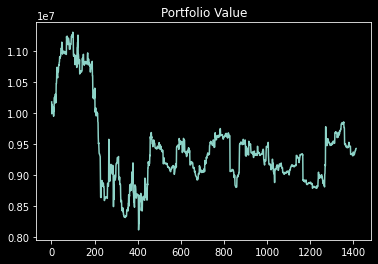

In [26]:
plt.title("Portfolio Value")
plt.plot(list(algo.metrics['Portfolio Marked']))
#plt.savefig('assetcurve.png')

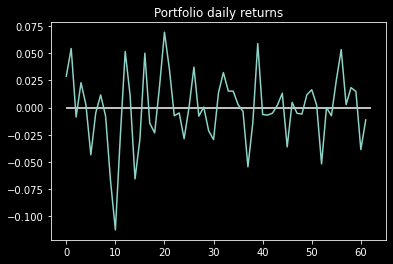

In [27]:
algo.metrics['date'] =  algo.metrics.index.map(lambda x : str(x)[:-8])
algo.metrics['hour'] =  algo.metrics.index.map(lambda x : str(x)[-8:])

plt.title("Portfolio daily returns")
daily_returns = algo.metrics.groupby(['date'])['Portfolio Marked'].first().pct_change().dropna().values
plt.hlines(0 ,0 ,daily_returns.shape[0])
plt.plot(daily_returns)

In [28]:
sr = ((np.mean(daily_returns)-0.035/365)/np.std(daily_returns)*math.sqrt(365))
sr

-0.5659529335940614

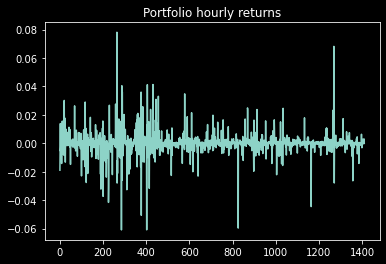

In [29]:
plt.title("Portfolio hourly returns")
returns = algo.metrics['Portfolio Marked'].pct_change().dropna().values

plt.plot(returns)
plt.savefig('hourly_returns.png')

In [30]:
sr = ((np.mean(returns)-0.035/24/365)/np.std(returns)*math.sqrt(365*24))
sr

-0.31429848016803463

In [33]:
dates = list(set(algo.metrics.date.values))
hours = list(set(algo.metrics.hour.values))
heatm = pd.DataFrame(columns=sorted(hours), index = sorted(dates))
heatm2 = pd.DataFrame(columns=sorted(hours), index = sorted(dates))
for d in sorted(dates):
    for h in sorted(hours):
        if d + h in algo.metrics.index and algo.metrics.loc[d + h]['Position USD'] != 0:
            heatm2.loc[d][h] = algo.metrics.loc[d + h]['Position USD']/abs(algo.metrics.loc[d + h]['Position USD'])
            heatm.loc[d][h] = algo.metrics.loc[d + h]['Position USD']
        else:
            heatm.loc[d][h] = 0
heatm = heatm.fillna(0)
heatm2 = heatm2.fillna(0)
heatm2

,01:00:00,02:00:00,03:00:00,04:00:00,05:00:00,06:00:00,07:00:00,08:00:00,09:00:00,10:00:00,...,14:00:00,15:00:00,16:00:00,17:00:00,18:00:00,19:00:00,20:00:00,21:00:00,22:00:00,23:00:00
2017-09-13,0,-1.0,1.0,0.0,-1.0,-1.0,1.0,-1.0,1.0,1.0,...,-1.0,1.0,-1.0,0.0,1.0,-1.0,-1.0,-1.0,-1.0,0
2017-09-21,0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.0,-1.0,...,-1.0,0.0,-1.0,1.0,-1.0,-1.0,1.0,-1.0,-1.0,0
2017-09-26,0,1.0,-1.0,-1.0,-1.0,-1.0,1.0,1.0,1.0,0.0,...,0.0,1.0,0.0,1.0,-1.0,1.0,-1.0,-1.0,1.0,0
2017-10-07,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
2017-10-10,0,1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.0,-1.0,...,-1.0,0.0,-1.0,1.0,0.0,1.0,-1.0,-1.0,-1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-01-03,0,-1.0,-1.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,1.0,1.0,1.0,1.0,1.0,1.0,0
2019-01-04,0,1.0,-1.0,-1.0,-1.0,0.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,0.0,1.0,1.0,-1.0,1.0,1.0,1.0,-1.0,0
2019-01-14,0,-1.0,0.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,...,1.0,-1.0,1.0,1.0,-1.0,1.0,1.0,-1.0,1.0,0
2019-01-15,0,1.0,-1.0,1.0,-1.0,1.0,-1.0,-1.0,-1.0,0.0,...,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,0.0,0.0,0


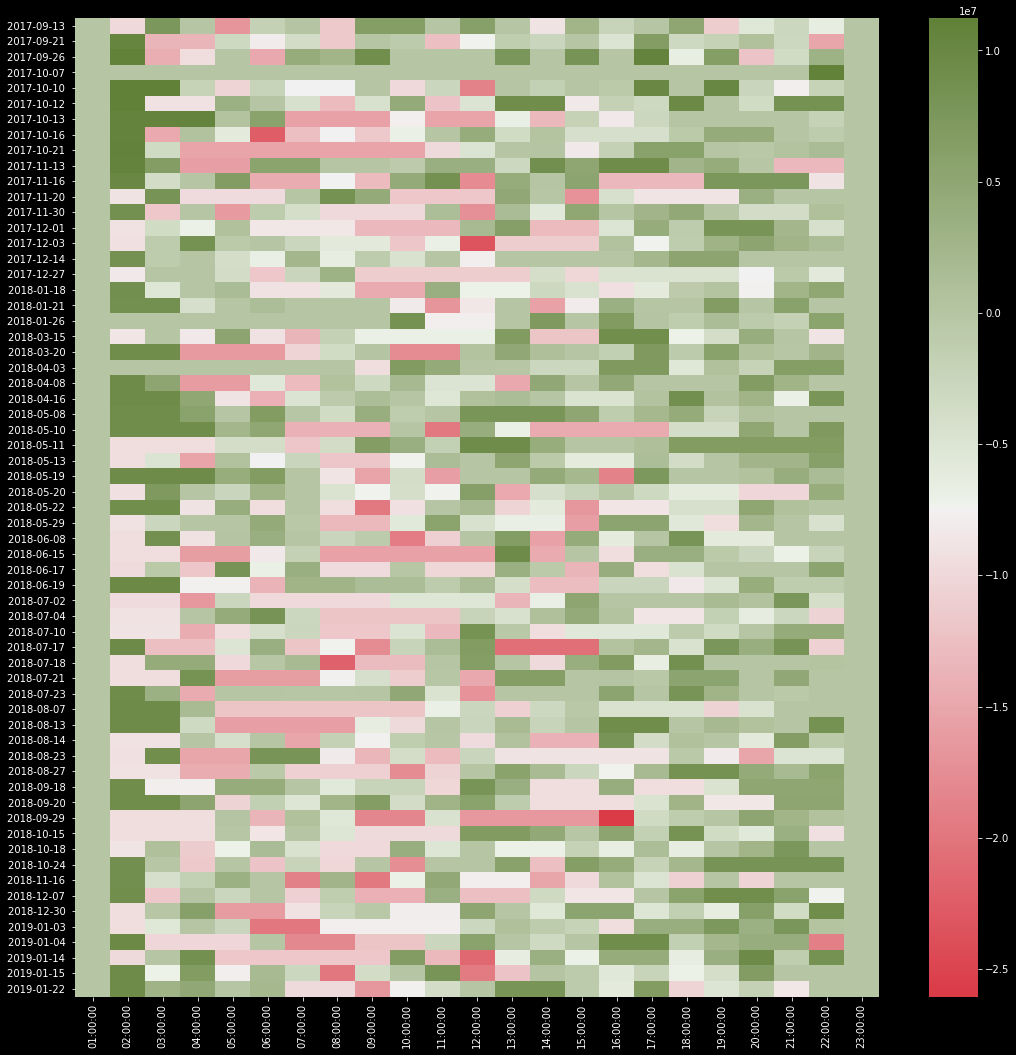

In [37]:
import seaborn as sns
import pandas as pd
import numpy as np

cmap = sns.diverging_palette(10, 110, s=75, l=50,
                                  n=9,as_cmap=True)


fig = plt.figure(figsize=(18, 18))
# Default heatmap
p1 = sns.heatmap(heatm, cmap = cmap)
plt.savefig('heatmap1.png')

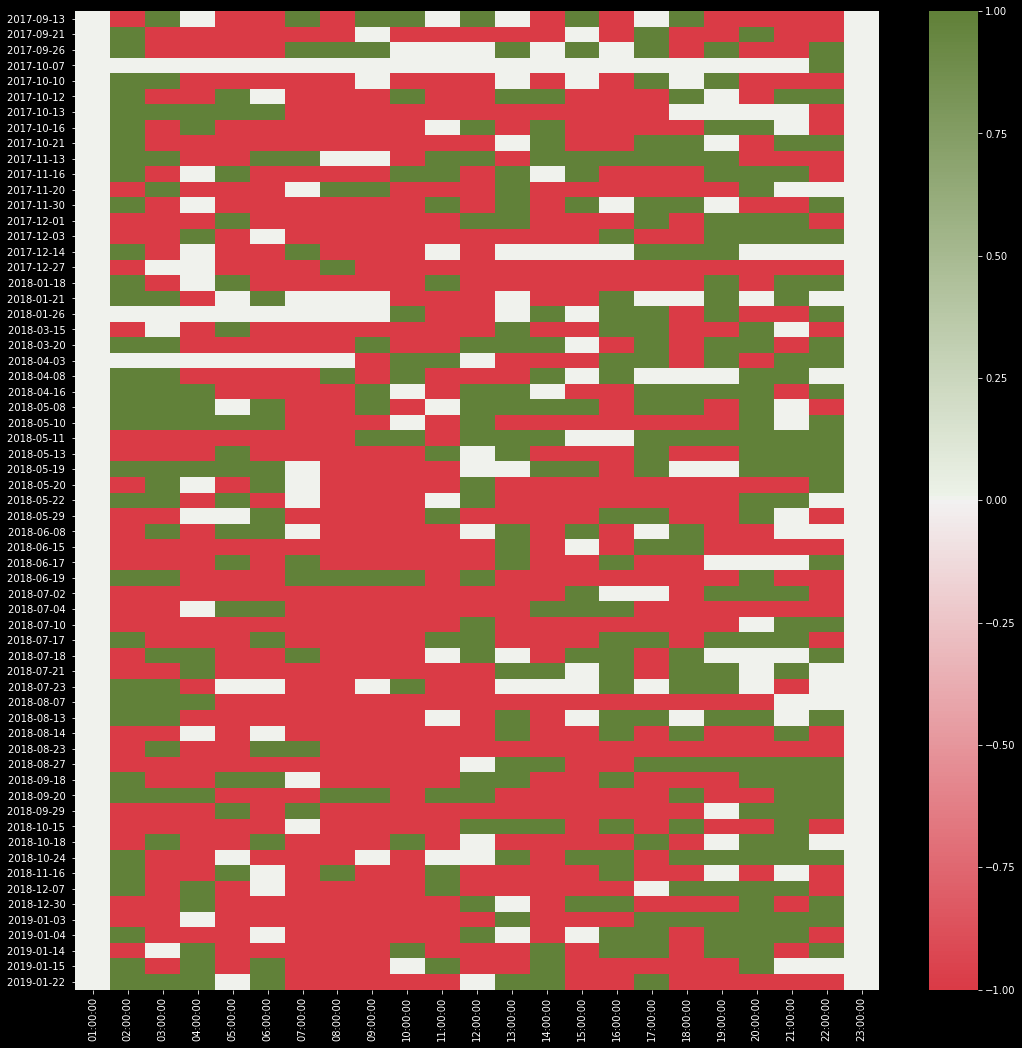

In [36]:
fig = plt.figure(figsize=(18, 18))
# Default heatmap
p1 = sns.heatmap(heatm2, cmap = cmap)
#plt.savefig('heatmap2.png')

In [ ]:
#best strategy play the opposite (with stoploss)
cash = []
for stop in range(1, 50):
    signal = Signal2(df['Bitcoin'])
    strategy = BitcoinNLPStrategy2()
    strategy.add_signal(signal)
    algo = customNLP(100000, df['Open'], strategy)
    algo.set_stoploss(stop/1000)
    
    algo.run(split = True, verbose = False)
    cash.append(algo.cash)
#plt.plot(list(algo.metrics['Portfolio Marked']))

### Generate Random Strategies

In [ ]:
strategy = BitcoinRandomStrategy()
sr = []
for i in range(0,100):
    loading_bar(i, 99)
    algo = customNLP(100000, df['Open'], strategy)
    algo.set_stoploss(0.01)
    algo.run(split = True, verbose = False)
    returns = algo.metrics['Portfolio Marked'].pct_change().dropna().values
    sr.append((np.mean(returns)-0.035/24/365)/np.std(returns)*math.sqrt(365*24))
np.mean(sr)

In [ ]:
np.median(sr)

## Plotting and Testing

In [ ]:
#Prints a simple loading bar
def loading_bar(n,N, message = ''):
    prc  = math.floor(n/N*100)
    a = prc*'#'
    b = (100-prc)*'_'
    clear_output(wait=True)
    display('|' + a + b + '|' + str(prc) + '%' + " " + message)